# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ziven Louis
- **Email:** zivenlouisuph@gmail.com
- **ID Dicoding:** ziven_louis_2i9N

## Menentukan Pertanyaan Bisnis

- Bagaimana tren PM 2.5 di setiap stasiun dari tahun 2014-2016?
- Apakah terdapat korelasi antara tingkat ozon (O3) dan suhu udara di stasiun "shunyi" selama tahun 2016?
- Bagaimana perbandingan konsentrasi rata-rata PM10 antara stasiun "changping" dan "dongsi" selama tahun 2014?

## Import Semua Packages/Library yang Digunakan
Pertama, kita akan melakukan import pada libraries yang akan digunakan yaitu numpy, pandas, matplotlib dan seaborn.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

## Data Wrangling

### Gathering Data
Untuk tahap gathering data, semua dataset akan digabung menjadi 1 dictionary untuk memudahkan aksesibilitas. Pertama-tama kita akan menyimpan nama-nama file yang ada kedalam sebuah dictionary. Kemudian, semua file akan dibaca menggunakan **pd.read_csv()**

Kita juga akan menambahkan sebuah variabel yang menampung seluruh dataset untuk mempermudah proses analisis dengan menggunakan **pd.concat()**

In [23]:
csv_file = {
   'aotizhongxin' : 'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
   'changping' :  'PRSA_Data_Changping_20130301-20170228.csv',
   'dingling' :  'PRSA_Data_Dingling_20130301-20170228.csv',
   'dongsi' :  'PRSA_Data_Dongsi_20130301-20170228.csv',
   'guanyuan' :  'PRSA_Data_Guanyuan_20130301-20170228.csv',
   'gucheng' :  'PRSA_Data_Gucheng_20130301-20170228.csv',
   'huairou' :  'PRSA_Data_Huairou_20130301-20170228.csv',
   'nongzhanguan' :  'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
   'shunyi' :  'PRSA_Data_Shunyi_20130301-20170228.csv',
   'tiantan' :  'PRSA_Data_Tiantan_20130301-20170228.csv',
   'wanliu' :  'PRSA_Data_Wanliu_20130301-20170228.csv',
   'wanshouxigong' :  'PRSA_Data_Wanshouxigong_20130301-20170228.csv',
}
df_list = {}
for key,file in csv_file.items():
    df_list[key] = pd.read_csv('Data/'+file, delimiter=",")
combined_df = pd.concat(df_list, ignore_index=True)


### Assessing Data

#### Memeriksa missing value
Untuk mengecek semua data frame, kita dapat menggunakan perulangan untuk setiap item yang ada pada dictionary. 
Fungsi yang akan digunakan untuk memeriksa keberadaan missing value adalah **df.isna().sum()** 

In [24]:
for key,df in df_list.items():
    print('Checking ' + key + ':') 
    print(df.isna().sum())
    print('==========================\n')

Checking aotizhongxin:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Checking changping:
No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Checking dingling:
No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Checking dongsi:
No            0

#### Hasil
Setelah program diatas dijalankan, terlihat bahwa semua Data Frame masih memiliki banyak data null.

#### Memeriksa data inaccurate
Untuk memeriksa data inaccurate, akan dilakukan algoritma yang sama seperti sebelumnya. Namun, kali ini kita akan menggunakan fungsi **df.describe()** untuk melihat anomali data yang ada. Untuk analisis ini, akan dilakukan pengecekan secara keseluruhan terlebih dahulu.

In [25]:
combined_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


#### Hasil
Terlihat bahwa nilai max dari PM2.5, PM10, SO2, NO2, CO dan O3 berada sangat jauh dari Q3 nya. Namun, melihat dari standar deviasinya yang cukup besar, kita belum bisa menilai apakah terdapat anomali pada data atau tidak. Oleh karena itu, pengecekan akan dilakukan menggunakan sorting pada kolom-kolom tersebut. Setelah disorting, kita akan mengambil 20 data teratas untuk dianalisis.

In [26]:
combined_df.sort_values(by='PM2.5', ascending=False).head(20)
combined_df.sort_values(by='PM10', ascending=False).head(20)
combined_df.sort_values(by='SO2', ascending=False).head(20)
combined_df.sort_values(by='NO2', ascending=False).head(20)
combined_df.sort_values(by='CO', ascending=False).head(20)
combined_df.sort_values(by='O3', ascending=False).head(20)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
109247,4056,2013,8,16,23,201.0,219.0,8.0,118.0,2700.0,1071.0,28.3,994.0,28.0,0.1,E,1.0,Dongsi
109252,4061,2013,8,17,4,66.0,66.0,6.0,58.0,1200.0,1071.0,29.8,995.1,15.9,0.0,NW,3.5,Dongsi
109246,4055,2013,8,16,22,198.0,233.0,7.0,102.0,2300.0,1071.0,28.4,994.1,28.1,0.0,E,0.8,Dongsi
109223,4032,2013,8,15,23,195.0,206.0,6.0,40.0,1600.0,1071.0,29.5,995.6,25.3,2.2,SSE,3.3,Dongsi
109224,4033,2013,8,16,0,203.0,206.0,6.0,34.0,1500.0,1071.0,27.2,995.5,24.7,0.3,SSW,2.9,Dongsi
109241,4050,2013,8,16,17,206.0,267.0,7.0,65.0,2000.0,1071.0,30.1,992.8,28.5,0.0,E,1.4,Dongsi
109243,4052,2013,8,16,19,187.0,222.0,8.0,86.0,2100.0,1071.0,29.5,993.6,28.4,0.0,ESE,1.2,Dongsi
109244,4053,2013,8,16,20,202.0,232.0,7.0,98.0,3300.0,1071.0,28.9,994.5,28.2,0.0,SSE,0.6,Dongsi
109245,4054,2013,8,16,21,202.0,242.0,7.0,95.0,3100.0,1071.0,28.8,994.1,28.3,0.5,SE,1.1,Dongsi
109242,4051,2013,8,16,18,207.0,273.0,8.0,85.0,2200.0,1071.0,30.0,993.3,28.4,0.0,ENE,1.5,Dongsi


#### Hasil
Setelah dianalisis secara satu per satu, terlihat bahwa nilai maksimum yang besar masih berada dalam kisaran yang dapat diterima jika dibandingkan dengan nilai kedua tertingginya. Hal ini menunjukkan bahwa meskipun terdapat beberapa nilai yang ekstrem, mereka masih konsisten dengan distribusi umum data. Dengan demikian, tidak ada bukti yang menunjukkan adanya anomali yang signifikan dalam dataset ini.

#### Memeriksa informasi data
Kita akan menggunakan **combined_df.info()** untuk memeriksa tipe data yang ada




In [27]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


Bisa dilihat bahwa semua kolom telah memiliki tipe data yang sesuai

### Memeriksa Data Duplikat
Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.

In [28]:
combined_df.duplicated().sum()

0

Bisa dilihat bahwa tidak terdapat data terduplikasi

### Hasil Final
Setelah melakukan pengecekan, ditemukan satu buah permasalahan yaitu terdapat missing value. Untuk memperbaiki masalah tersebut, akan dilakukan tahap data cleaning.

### Cleaning Data
Untuk mengatasi missing value, kita dapat menggunakan fungsi **df.fillna()** . Kita akan mengganti data yang null dengan data sebelumnya dari kolom tersebut. Hal tersebut dapat dilakukan karena kita sedang menganalisis data berupa time series. Tidak lupa digunakan parameter inplace=True agar data langsung diganti pada df tersebut.

In [29]:
for key, df in df_list.items():
    df.bfill(inplace = True)

Setelah menjalankan program tersebut, kita dapat mengecek apakah semua data sudah terisi dengan baik.

In [30]:
combined_df = pd.concat(df_list, ignore_index=True)
combined_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dapat kita lihat bahwa tidak ada lagi data missing value.

## Exploratory Data Analysis (EDA)

### Eksplorasi combined_df
Pertama, kita akan mengeksplorasi data combined_df terlebih dahulu. Kita akan menghitung rata-rata nilai PM 2.5 dari setiap stasiun dan gabungan dari setiap stasiun. Data-data akan dihitung per bulannya dimana nilai perbulan adalah nilai rata-rata dari bulan tersebut.

In [31]:
filtered_df = combined_df[(combined_df['year'] >= 2014) & (combined_df['year'] <= 2016)]
filtered_df['datetime'] = pd.to_datetime(filtered_df[['year', 'month', 'day', 'hour']]).dt.to_period('M')
grouped_df_q1_1 = filtered_df.groupby(['station', 'datetime']).agg({
    'PM2.5': 'mean'
}).reset_index()
grouped_df_q1_2 = filtered_df.groupby('datetime').agg({
    'PM2.5': 'mean'
}).reset_index()
print(grouped_df_q1_1.describe())
print(grouped_df_q1_2.describe())

            PM2.5
count  432.000000
mean    78.967536
std     29.079826
min     32.573925
25%     57.201042
50%     72.001270
75%     94.663508
max    165.819892
            PM2.5
count   36.000000
mean    78.967536
std     28.170870
min     42.891164
25%     58.214477
50%     68.844926
75%     93.532424
max    154.194320


### Eksplorasi data Shunyi tahun 2016
Selanjutnya, kita akan mengambil data Ozon dan suhu udara yang ada pada stasiun Shunyi tahun 2016. Data akan dikelompokkan berdasarkan bulan dari data tersebut. Selanjutnya, kita menghitung korelasi antara rata-rata ozon dan rata-rata suhu udara untuk setiap bulan.

In [32]:
filtered_df = df_list['shunyi'][df_list['shunyi']['year'] == 2016]
filtered_df['datetime'] = pd.to_datetime(filtered_df[['year', 'month', 'day', 'hour']])
grouped_df_q2 = filtered_df.groupby(filtered_df['datetime'].dt.month.rename('month')).agg({
    'O3': 'mean',
    'TEMP': 'mean'
}).reset_index()
grouped_df_q2.corr()

,month,O3,TEMP
month,1.000000,-0.283999,0.170338
O3,-0.283999,1.000000,0.752514
TEMP,0.170338,0.752514,1.000000


Bisa diihat bahwa Ozon dan TEMP memiliki korelasi yang positif sehingga menunjukkan adanya hubungan yang kuat antara 2 variabel tersebut.

### Eksplorasi combined_df stasiun Changping dan Dongsi tahun 2014
Selanjutnya, kita akan melakukan eksplorasi pada kadar PM 10 stasiun Changping dan Dongsi pada tahun 2014. Data akan dikelompokkan per bulannya.

In [33]:
filtered_df = combined_df[((combined_df.station=='Changping') | (combined_df.station=='Dongsi')) & (combined_df['year'] == 2014)]
filtered_df['datetime'] = pd.to_datetime(filtered_df[['year', 'month', 'day', 'hour']])
grouped_df_q3 = filtered_df.groupby(['station', filtered_df['datetime'].dt.month.rename('month')]).agg({
    'PM10': 'mean',
}).reset_index()
grouped_df_q3.head(24)

,station,month,PM10
0,Changping,1,110.596774
1,Changping,2,150.083333
2,Changping,3,127.849462
3,Changping,4,143.609722
4,Changping,5,100.363575
5,Changping,6,61.486111
6,Changping,7,102.622312
7,Changping,8,75.963038
8,Changping,9,78.821528
9,Changping,10,138.069892


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren PM 2.5 di setiap stasiun dari tahun 2014-2016?
Untuk menjawab pertanyaan ini, kita akan menggambarkan data yang telah di eksplorasi menggunakan line chart. Data yang akan ditampilkan adalah data PM 2.5 pada setiap stasiunnya (garis warna abu-abu) dan data rata-rata seluruh stasiun (garis warna biru). 

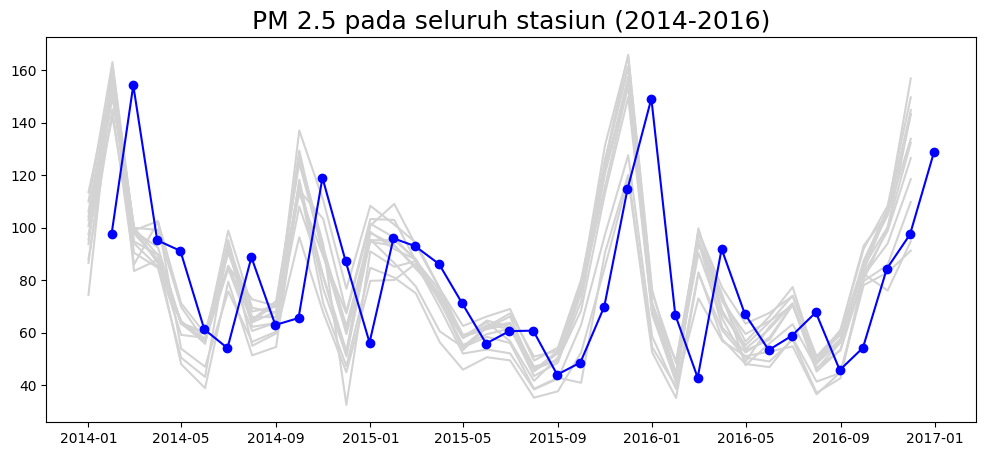

In [34]:
df = grouped_df_q1_1.copy()
df_all = grouped_df_q1_2.copy()
df['datetime'] = pd.to_datetime(df['datetime'].dt.to_timestamp())
plt.figure(figsize=(12, 5))
for station in df['station'].unique():
    station_data = df[df['station'] == station]
    plt.plot(station_data['datetime'], station_data['PM2.5'], label=station, color='#d3d3d3')
plt.plot(df_all['datetime'], df_all['PM2.5'], marker='o', label='All', color='blue')
plt.title('PM 2.5 pada seluruh stasiun (2014-2016)', size=18)
plt.show()

Berdasarkan visualisasi data tersebut, dapat diketahui bahwa kualitas rata-rata PM 2.5 pada seluruh stasiun mengalami fluktuasi tak berpola. Contohnya pada awal tahun 2014 dan awal tahun 2016, nilai PM 2.5 tiba-tiba melonjak tinggi sedangkan awal tahun 2015 tingkat PM 2.5 mengalami penurunan.

### Pertanyaan 2: Apakah terdapat korelasi antara tingkat ozon (O3) dan suhu udara di stasiun "shunyi" selama tahun 2016?
Untuk menjawab pertanyaan ini, kita akan menggambarkan data menggunakan line chart kembali.

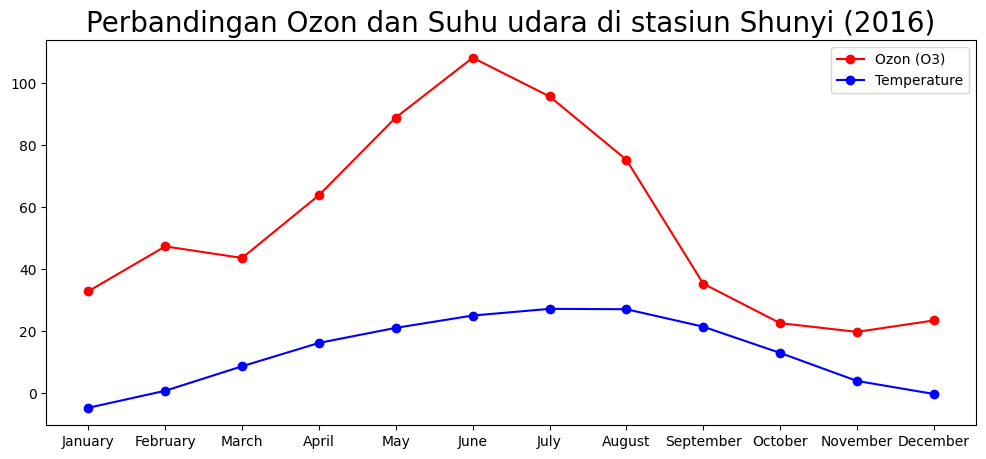

In [35]:
df = grouped_df_q2.copy()
df['month'] = pd.to_datetime(df['month'], format='%m').dt.strftime('%B') 
plt.figure(figsize=(12, 5))
plt.plot(df['month'], df['O3'], marker='o', label='Ozon (O3)', color='red')
plt.plot(df['month'], df['TEMP'], marker='o', label='Temperature', color='blue')
plt.title('Perbandingan Ozon dan Suhu udara di stasiun Shunyi (2016)', size=20)
plt.legend()
plt.show()

Bisa dilihat bahwa tingkat O3 dan suhu udara cenderung meningkat dan berkurang secara bersamaan. Tingkat Ozon dan suhu udara mengalami peningkatan menjelang pertengahan tahun.
### Pertanyaan 3: Bagaimana perbandingan konsentrasi rata-rata PM10 antara stasiun "changping" dan "dongsi" selama tahun 2014?

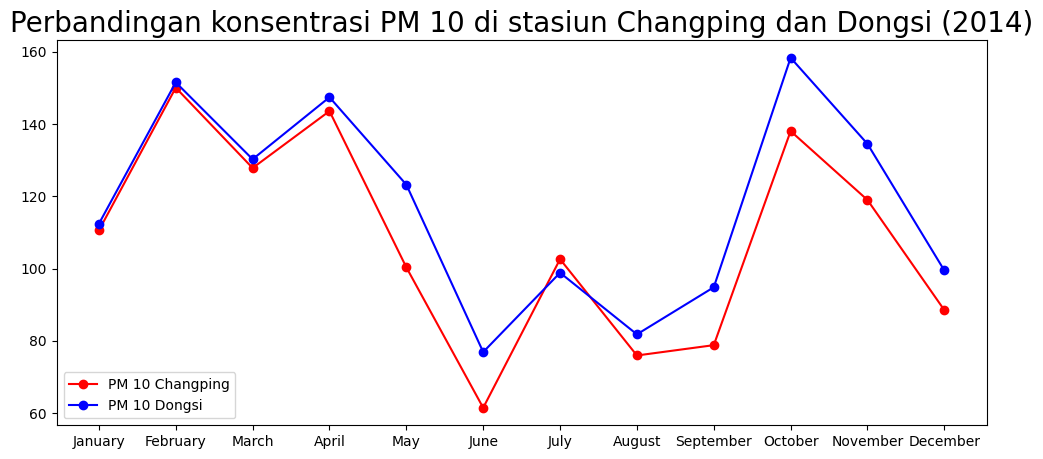

In [36]:
df = grouped_df_q3.copy()
df['month'] = pd.to_datetime(df['month'], format='%m').dt.strftime('%B') 
plt.figure(figsize=(12, 5))
plt.plot(df[df.station == 'Changping']['month'], df[df.station == 'Changping']['PM10'], marker='o', label='PM 10 Changping', color='red')
plt.plot(df[df.station == 'Dongsi']['month'], df[df.station == 'Dongsi']['PM10'], marker='o', label='PM 10 Dongsi', color='blue')
plt.title('Perbandingan konsentrasi PM 10 di stasiun Changping dan Dongsi (2014)', size=20)
plt.legend()
plt.show()

Bisa dilihat bahwa konsentrasi PM 10 di stasiun Changpin dan Dongsi pada tahun 2014 memiliki tren yang sangat mirip.

## Conclusion

- **Kesimpulan Pertanyaan 1:**
  Berdasarkan visualisasi data tersebut, dapat disimpulkan bahwa kualitas rata-rata PM2.5 pada seluruh stasiun mengalami fluktuasi yang tak berpola selama periode waktu yang diamati. Ada beberapa contoh fluktuasi yang signifikan yang terjadi pada awal tahun 2014 dan awal tahun 2016, di mana nilai PM2.5 tiba-tiba melonjak tinggi. Sebaliknya, pada awal tahun 2015, terjadi penurunan dalam tingkat PM2.5. Hal ini menunjukkan adanya variasi yang tidak teratur dalam kualitas udara selama periode yang diamati, dan fluktuasi tersebut mungkin dipengaruhi oleh sejumlah faktor, termasuk pola cuaca, aktivitas manusia, dan faktor-faktor lingkungan lainnya. 
 

- **Kesimpulan Pertanyaan 2:**
  Berdasarkan data yang diberikan, terlihat bahwa terdapat kecenderungan bahwa tingkat ozon (O3) dan suhu udara (TEMP) cenderung meningkat dan berkurang secara bersama-sama selama tahun 2016 di stasiun "shunyi". Ini menunjukkan adanya hubungan yang erat antara kedua variabel tersebut. Peningkatan suhu udara yang diakibatkan oleh cuaca panas dapat meningkatkan pembentukan ozon di atmosfer, sehingga menjelaskan kenaikan tingkat ozon yang terjadi bersamaan dengan peningkatan suhu udara. Sebaliknya, saat suhu udara menurun, pembentukan ozon juga cenderung berkurang. Kedua variabel ini saling memengaruhi dan seringkali menunjukkan pola yang serupa, yang dapat dilihat dari fluktuasi mereka selama tahun 2016 di stasiun "shunyi".

- **Kesimpulan Pertanyaan 3:**
  Berdasarkan hasil analisis yang telah dilakukan, dapat dilihat bahwa meskipun kedua stasiun mengalami fluktuasi bulanan yang serupa dan terdapat sedikit perbedaan dalam nilai rata-rata PM10 antara kedua stasiun tersebut pada bulan-bulan tertentu. Stasiun Dongsi cenderung memiliki nilai rata-rata PM10 yang sedikit lebih tinggi dibandingkan dengan stasiun Changping, terutama pada bulan Oktober dan November. 